In [54]:
#About Dataset

In [ ]:
#  CAR                      car acceptability
#    . PRICE                  overall price
#    . . buying               buying price
#    . . maint                price of the maintenance
#    . TECH                   technical characteristics
#    . . COMFORT              comfort
#    . . . doors              number of doors
#    . . . persons            capacity in terms of persons to carry
#    . . . lug_boot           the size of luggage boot
#    . . safety               estimated safety of the car

# The Car Evaluation Database contains examples with the structural information removed, i.e.,directly 
# relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.
    
# Number of Instances: 1728
# Number of Attributes: 6
    
#    buying       v-high, high, med, low
#    maint        v-high, high, med, low
#    doors        2, 3, 4, 5-more
#    persons      2, 4, more
#    lug_boot     small, med, big
#    safety       low, med, high
    
#    class      N          N[%]
#    -----------------------------
#    unacc     1210     (70.023 %) 
#    acc        384     (22.222 %) 
#    good        69     ( 3.993 %) 
#    v-good      65     ( 3.762 %) 

In [52]:
# IMPORT MODULES

In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing

In [ ]:
# READING CSV FILE

In [15]:
url ="car_evaluation.csv"
car = pd.read_csv(url)

In [16]:
#FEATURE ENGINEERING

In [17]:
#1  CONVERT STRING TO NUMBER
# a) Using Map function
car['Lug_Boot'] = car['Lug_Boot'].map({'small':0,'med':1,'big':2})
car['Safety'] = car['Safety'].map({'low':0,'med':1,'high':2})
car['Maintenance Cost'] = car['Maintenance Cost'].map({'low':0,'med':1,'high':2,'vhigh':3})
car['Buying Price'] = car['Buying Price'].map({'low':0,'med':1,'high':2,'vhigh':3})

In [18]:
# b) Using Label-Encoder
label_encoder = preprocessing.LabelEncoder()
car['Number of Doors'] = label_encoder.fit_transform(car['Number of Doors'])        
car['Number of Persons'] = label_encoder.fit_transform(car['Number of Persons'])    
car['Decision'] = label_encoder.fit_transform(car['Decision'])
print("After Encoding, the data will look like as follows :")
print(car.head())

After Encoding, the data will look like as follows :
   Buying Price  Maintenance Cost  Number of Doors  Number of Persons  \
0             3                 3                0                  0   
1             3                 3                0                  0   
2             3                 3                0                  0   
3             3                 3                0                  0   
4             3                 3                0                  0   

   Lug_Boot  Safety  Decision  
0         0       1         2  
1         0       2         2  
2         1       0         2  
3         1       1         2  
4         1       2         2  


In [19]:
#2  CHECKING FOR MISSING VALUES 
print(car.isnull().sum())
print("No Missing Values are Found in any Column")

Buying Price         0
Maintenance Cost     0
Number of Doors      0
Number of Persons    0
Lug_Boot             0
Safety               0
Decision             0
dtype: int64
No Missing Values are Found in any Column


In [20]:
# ANALYZING THE DATA

In [53]:
print(car.describe())
print(car.info())

       Buying Price  Maintenance Cost  Number of Doors  Number of Persons  \
count   1727.000000       1727.000000      1727.000000        1727.000000   
mean       1.499131          1.499131         1.500869           1.000579   
std        1.118098          1.118098         1.118098           0.816615   
min        0.000000          0.000000         0.000000           0.000000   
25%        0.500000          0.500000         1.000000           0.000000   
50%        1.000000          1.000000         2.000000           1.000000   
75%        2.000000          2.000000         2.500000           2.000000   
max        3.000000          3.000000         3.000000           2.000000   

          Lug_Boot       Safety     Decision  
count  1727.000000  1727.000000  1727.000000  
mean      1.000579     1.000579     1.552982  
std       0.816615     0.816615     0.876136  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000  
50%       1.000000     1

In [22]:
# Types of Graph Plotting

The BoxPlot for Each Column are :


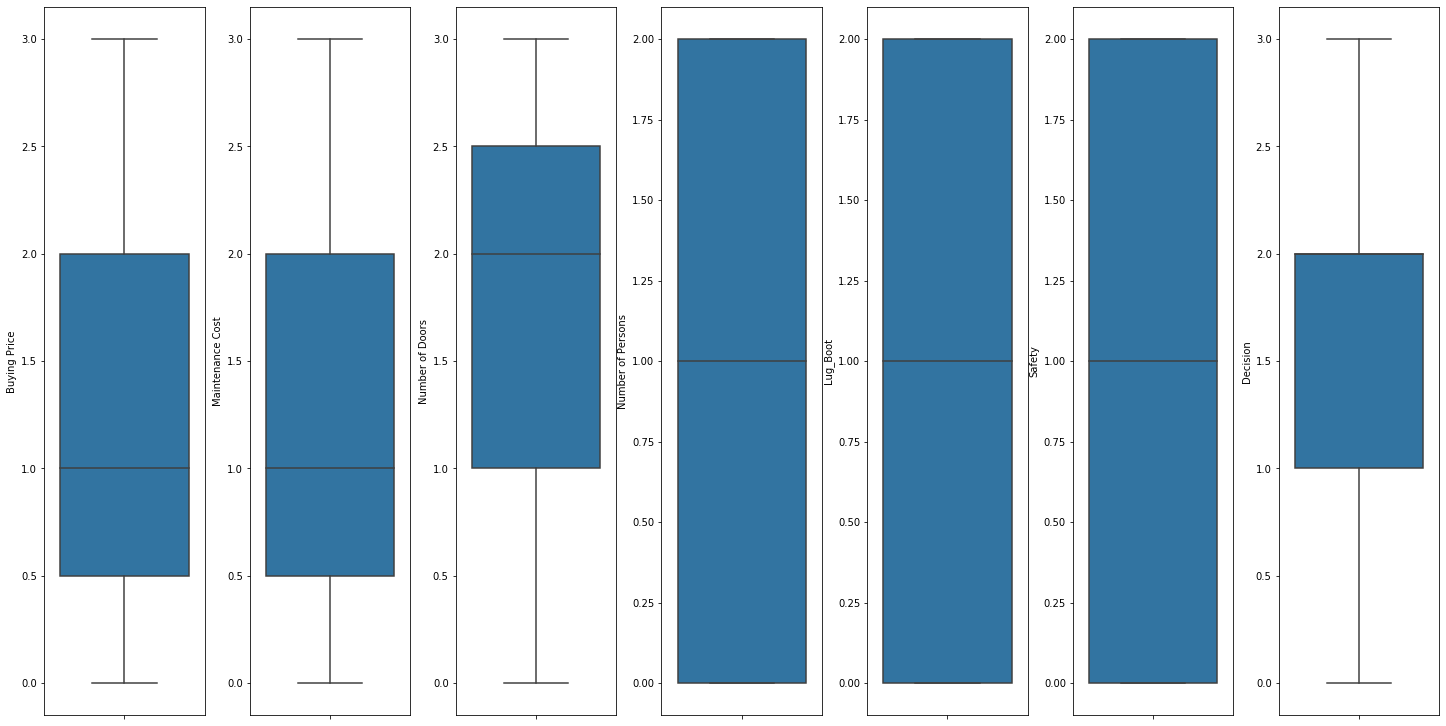

In [24]:
#1
print("The BoxPlot for Each Column are :")
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(20,10))
index=0
axs = axs.flatten() 
for k,v in car.items():
    sb.boxplot(y=v, data=car, ax=axs[index]) 
    index = index + 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

The DistPlot for Each Column are :


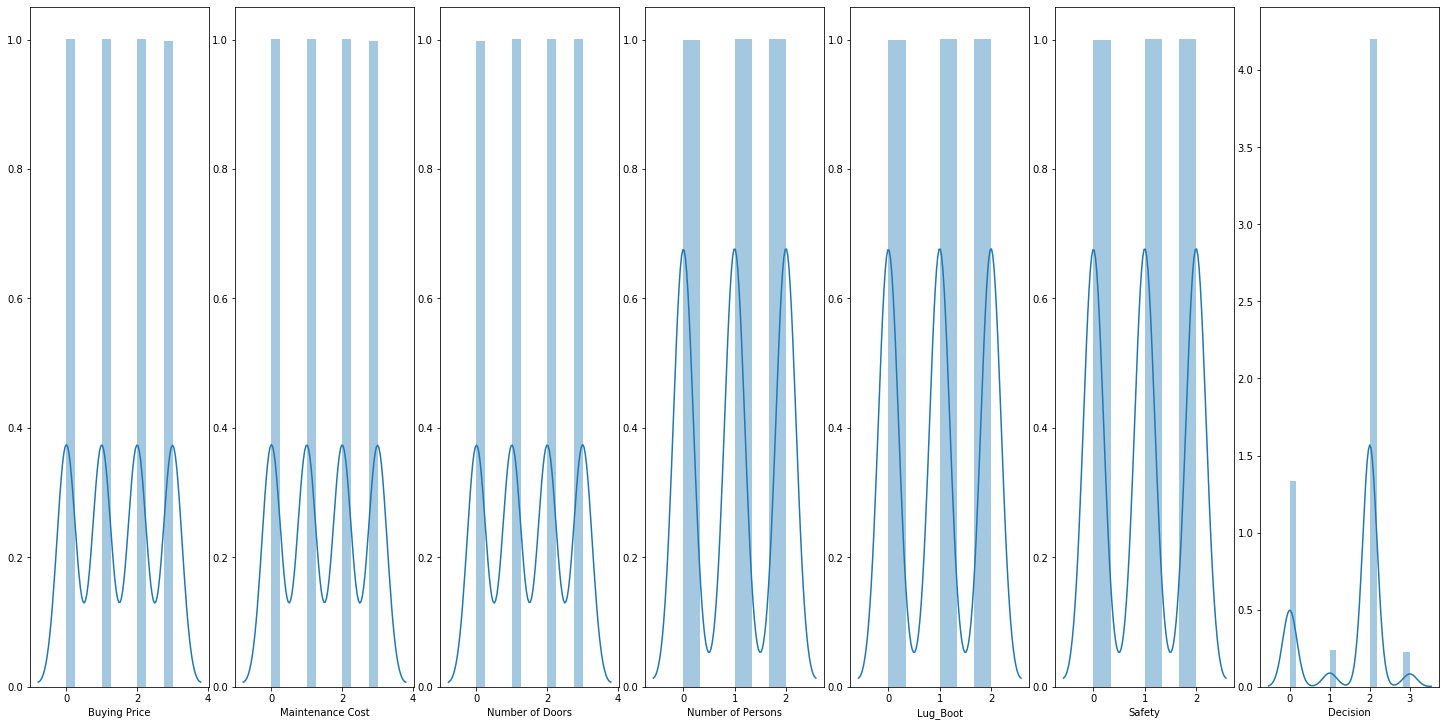

In [27]:
#2
print("The DistPlot for Each Column are :")
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(20,10))
index=0
axs = axs.flatten()   
for k,v in car.items():
    sb.distplot(v,ax=axs[index])  
    index = index + 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

The CountPlot for Each Column are :


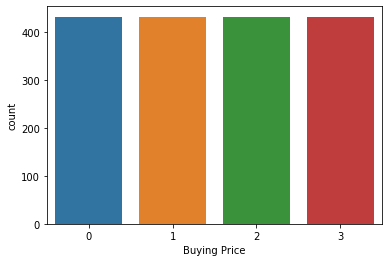

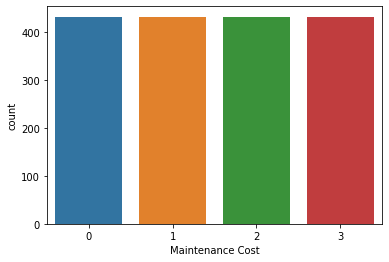

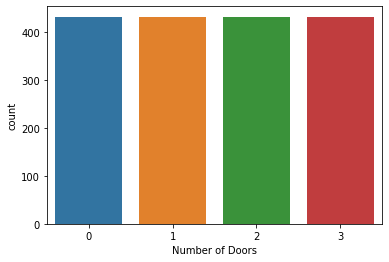

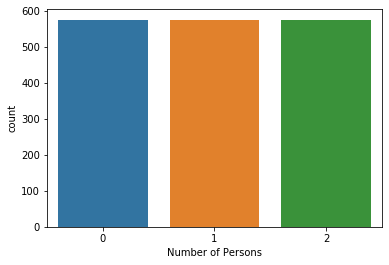

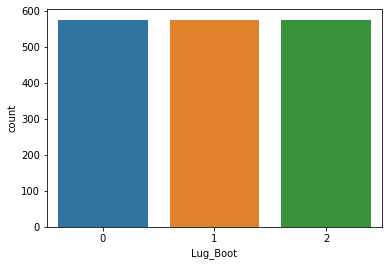

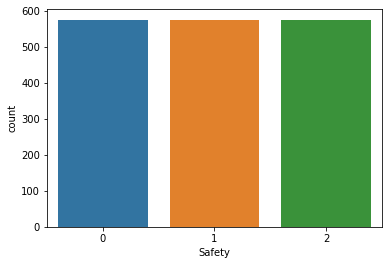

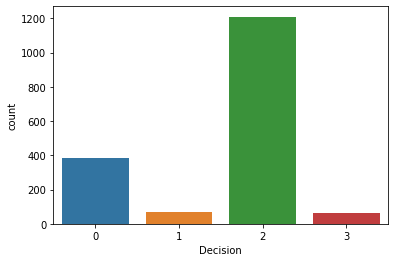

In [28]:
#3
print("The CountPlot for Each Column are :")
for column in car:
    sb.countplot(car[column])
    plt.show()

The RegPlot for Each Column are :


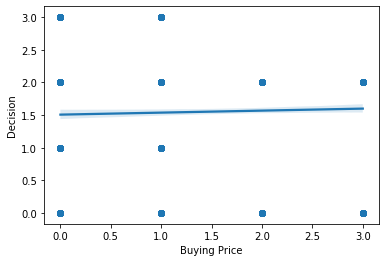

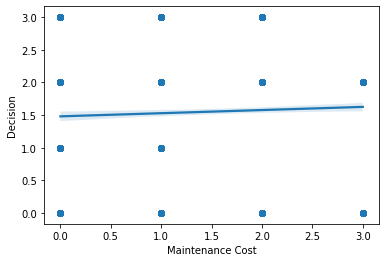

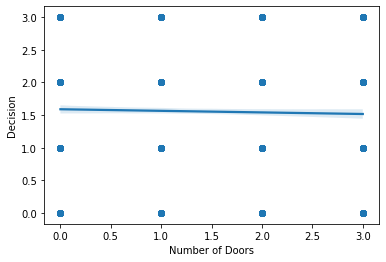

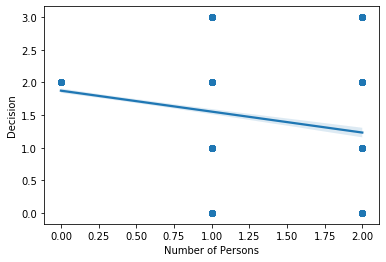

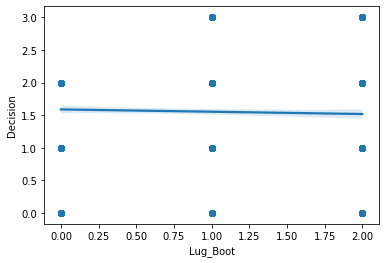

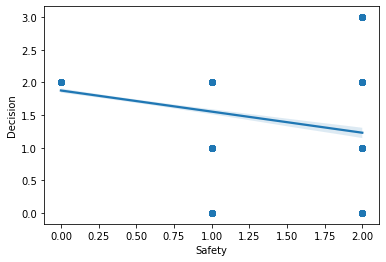

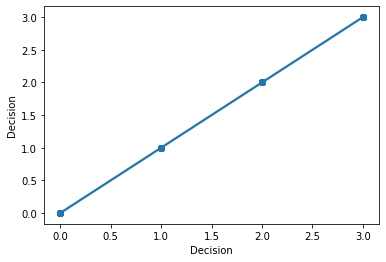

In [51]:
#4
print("The RegPlot for Each Column are :")
for column in car:
    sb.regplot(x=column, y='Decision', data=car)
    plt.show()

In [30]:
car['Buying Price'].value_counts()

2    432
1    432
0    432
3    431
Name: Buying Price, dtype: int64

In [31]:
car['Maintenance Cost'].value_counts()

2    432
1    432
0    432
3    431
Name: Maintenance Cost, dtype: int64

In [32]:
car['Number of Doors'].value_counts()

3    432
2    432
1    432
0    431
Name: Number of Doors, dtype: int64

In [33]:
car['Number of Persons'].value_counts()

2    576
1    576
0    575
Name: Number of Persons, dtype: int64

In [34]:
car['Lug_Boot'].value_counts()

2    576
1    576
0    575
Name: Lug_Boot, dtype: int64

In [35]:
car['Safety'].value_counts()

2    576
1    576
0    575
Name: Safety, dtype: int64

In [36]:
car['Decision'].value_counts()

2    1209
0     384
1      69
3      65
Name: Decision, dtype: int64

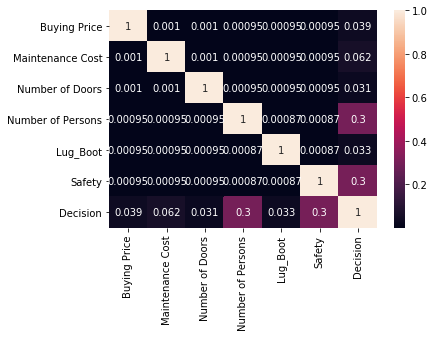

In [37]:
# Correlation Matrix
sb.heatmap(car.corr().abs(), annot=True)

In [38]:
X = car.iloc[:, 0:6]
Y = car.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [39]:
#ALGORITHMS

In [41]:
#1 KNeighborsClassifier Model
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)

In [42]:
print("The Accuracy is : ",accuracy_score(y_pred,y_test))
print("The Trained Score is : ",kn.score(X_train,y_train))

print("The Confusion Matrix is : ")
print(confusion_matrix(y_pred, y_test))
print("The Classification Report is :")
print(classification_report(y_pred, y_test))

The Accuracy is :  0.9450867052023122
The Trained Score is :  0.9804489500362057
The Confusion Matrix is : 
[[ 69   3   3   4]
 [  2  10   0   0]
 [  6   1 236   0]
 [  0   0   0  12]]
The Classification Report is :
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        79
           1       0.71      0.83      0.77        12
           2       0.99      0.97      0.98       243
           3       0.75      1.00      0.86        12

    accuracy                           0.95       346
   macro avg       0.84      0.92      0.87       346
weighted avg       0.95      0.95      0.95       346



In [43]:
#2 RandomForestClassifier Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [44]:
print("The Accuracy is : ",accuracy_score(y_pred,y_test))
print("The Trained Score is : ",rf.score(X_train,y_train))
print("The Confusion Matrix is : ")
print(confusion_matrix(y_pred, y_test))
print("The Classification Report is :")
print(classification_report(y_pred, y_test))

The Accuracy is :  0.976878612716763
The Trained Score is :  1.0
The Confusion Matrix is : 
[[ 74   0   0   1]
 [  2  10   0   0]
 [  1   0 239   0]
 [  0   4   0  15]]
The Classification Report is :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.71      0.83      0.77        12
           2       1.00      1.00      1.00       240
           3       0.94      0.79      0.86        19

    accuracy                           0.98       346
   macro avg       0.90      0.90      0.90       346
weighted avg       0.98      0.98      0.98       346

